# Rodrigo Vega Vilchis - Tarea...

## Ejercicios:


#### 1. Basado en los códigos anteriores, escriba un programa para implementar el método de integración númerica de Euler para $N$ Dimensiones. 

In [1]:
using LinearAlgebra
using PyPlot

using PyCall
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/rockdrigo6/.julia/conda/3/lib/python3.7/site-packages/numpy/__init__.py'>

### Ejercicio 1: Método de Euler paara $N$ dimensiones

Para poder implementar este método de un sistema de $N$ ecuaciones diferenciales ordinarias, tenemos que seguir las reglas:

1. Debemos implementar una condición inicial de nuestro sistema, en este caso sería un vector de tipo

$$\vec{y}(t_0)=\vec{y_0}$$

donde el vector $y_0$ tiene $N$ entradas. También debemos definir un tamaño de paso $\Delta t$ que es equivalente al paso de las interaciones que vamos haciendo con la función, es decir, podemos calcular el punto $(t_{k+1},y_{k+1})$ a partir del punto precedente $(t_{k},y_k)$. Entonces

$$t_{k+1}=t_k + \Delta t$$

$$y_{k+1}=y_k + f(t_k,y_k)\cdot\Delta t$$

Implementaré a continuación el métdo de Euler bajo las consideraciones anteriores.

In [10]:
function eulerND(f,x0,t0,tf,dt)                #x0 es un vector N-dimensional
    tiempos = range(t0, stop = tf, step = dt)  #Definimos una discretización del paso dt
    n = length(tiempos)                        #Número de iteraciones a realizar
    dim = length(x0)                           #La dimensión del sistema de EDO, en este caso N-dimensional
    
    xs = zeros(n,dim)                          #Arreglo solución del sistema. Es una matriz de 
                                               # n-iteraciones × dimensión del sistema.
    xs[1,:] = x0                               #En el primer renglón de nuestro conjunto solución, imponemos
                                               # las condiciones iniciales
    for i in 2:n #aplicamos las iteraciones
        xs[i,:] = xs[i-1,:] + dt*f(xs[i-1,:])
    end
    return (tiempos,xs)
end       
    

eulerND (generic function with 1 method)

#### 2. Dado el siguiente siguiente sistema lineal de ecuaciones diferenciales ordinarias (2D):
    
  
    
$
\dot{\vec{x}} = \left[\begin{array}{c} \dot{x_1} \\ \dot{x_2} \end{array}\right]= \left[\begin{array}{c} \alpha x_1 + \beta x_2 \\  \gamma x_1 + \delta x_2 \end{array}\right] = \left[\begin{array}{cc} \alpha  & \beta  \\  \gamma & \delta \end{array}\right] \left[\begin{array}{c} x_1 \\ x_2 \end{array}\right],
$

##### A. Muestre **_cualitativamente_** TODOS los posibles casos del problema de eigenvalores, esto es, todos los posibles tipos de puntos de equilibrio (atractor, repulsor, silla, etc). Para esto, calcule de manera general los eigenvalores $\lambda_1$ y $\lambda_2$, para $\alpha$, $\beta$, $\gamma$ y $\delta$ de manera que se abarquen todos los casos. Asimismo esboce el **Plano Traza-Determinante** del sistema, mostrando las zonas donde se encuentran dichos casos.

\begin{align*}
\det\begin{pmatrix}
\alpha-\lambda & \beta\\
\gamma & \delta-\lambda
\end{pmatrix}&=\lambda^2-\lambda TrA+\det A\\
&=0
\end{align*}

Calculamos las raíces para obtener $\lambda$ teniendo

\begin{align*}
\lambda_{1,2}&= \frac{TrA\pm\sqrt{(-TrA)^2-4\det A}}{2}
\end{align*}

Sabemos que las soluciones van a estar dadas en términos de como sea la raíz cuadrada, tendremos los casos

* $(Tra)^2-4\det A>0$, entonces tendremos eigenvalores reales.
* $(Tra)^2-4\det A<0$, entonces tendremos eigenvalores imaginarios.
* $(Tra)^2-4\det A=0$, entonces tendremos eigenvalores reales repetidos.

![tabla1.png](tabla1.png)

Para determinar el plano Traza-Determinante poner al determinante en función de la traza, es decir

\begin{align*}
(TrA)^2-4\det A=0\\
\Longleftrightarrow\\
\det A=\frac{(Tr A)^2}{4}
\end{align*}

Entonces el plano traza-determinante está dado por

In [2]:
f(x) = x^4/4

f (generic function with 1 method)

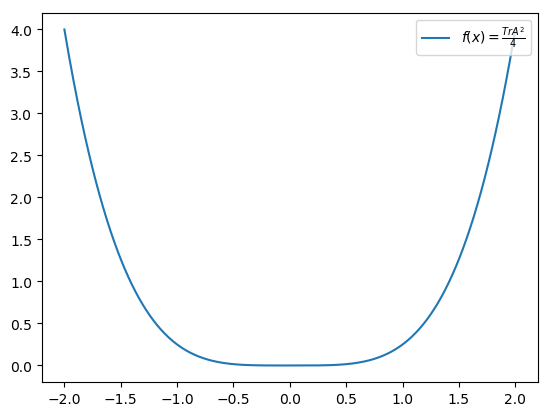

PyObject <matplotlib.legend.Legend object at 0xd11413cc>

In [3]:
xs = range(-2, stop = 2, length = 500)
ys = [f(x) for x in xs]

plt.plot(xs,ys,label=L"$f(x)=\frac{TrA^2}{4}$")
plt.legend(loc = "upper right")

En este plano podemos distinguir diferentes regiones donde el sistema lineal tiene eigenvalores reales (iguales y distintos) y eigenvalores imaginarios.

Sabemos que si

\begin{align*}
TrA^2-\det A>0
\end{align*}

los eigenvalores pueden ser positivos o negativos, en el caso en donde tenemos

$$\lambda_1=\frac{TrA+\sqrt{TrA^2-4\det A}}{2}$$

tenemos un eigenvalor puramente positivo por lo que para este caso tendremos una fuente. Analizando el otro caso en donde

$$\lambda_2=\frac{TrA-\sqrt{TrA^2-4\det A}}{2}$$

pueden ocurrir tres casos, 

1. $\det A=0$
2. $\det A>0$
3. $\det A<0$

Si $\det A=0$, entonces tenemos un eigenvalor igual a cero y el otro positivo que bien podría darnos la forma de una especie de fuente alrededor del cero. Para $\det A>0$ y $TrA>0$ tenemos que 

$$\frac{TrA-\sqrt{TrA^2-4\det A}}{2}>0$$

Lo que significa tener dos eigenvalores positivos y por lo tanto una fuente en el origen. Para el caso donde $\det A<0$ y $TrA>0$ tenemos que

$$\frac{TrA-\sqrt{TrA^2-4\det A}}{2}<0$$

y tendríamos un eigenvalor positivo y uno negativo lo cual significa un punto silla. Podemos tener los casos contrarios cuando consideramos $TrA<0$ y 

1. $\det A>0$ son dos eigenvalores negativos lo que nos da un sumidero
2. $\det A<0$ es un eigenvalor negativo y otro positivo, lo que nos da otro punto silla 
2. $\det A=0$ para un eigenvalor negativo y el otro cero lo que podría significar un sumidero hacia el cero

Hay que notar que en todos estos casos, quedan por debajo de la parábola, pues se cumple que

$$\det A<\frac{TrA^2}{4}$$

A lo largo de la parábola, es decir para

$$\det A=\frac{TrA^2}{4}$$

Es para los casos en donde tenemos eigenvalore repetidos, si $TrA<0$, ambos son negativos y en caso contrario, ambos son positivos. Para cuando tenemos que 

\begin{align*}
TrA^2-4\det A&<0\\
TrA^2&<4\det A\\
\det A &> \frac{TrA^2}{4}
\end{align*}

tenemos los casos imaginarios que quedan por arriba de la parábola y se distinguen en espiral derecha, izquierda y centros. La siguiente figura nos muestra un resumen de todo lo anterior.

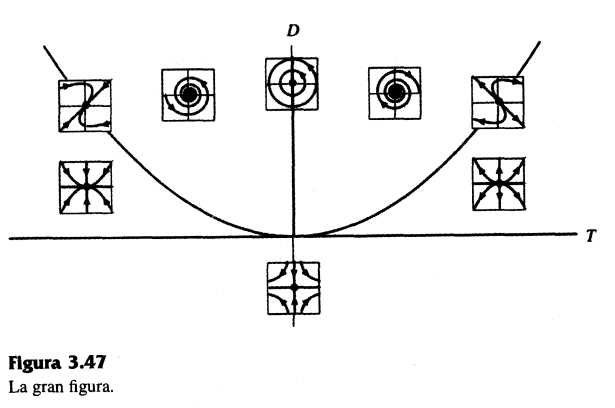

##### B. Apoyandose en la libreria *numpy*, escriba un programa que calcule computancionalmente los eigenvectores asociados a valores arbitrarios de $\alpha,\beta,\gamma,\delta$, y (apoyandose en lo trabajado en clase) grafique para cada una el espacio fase y cuatro curvas solución (*i.e.* cuatro condiciones inciciales diferentes) alrededor del punto de equilibrio $(0,0)$ que ejemplifiquen bien las características de dicho punto. Las curvas solución deberán ser obtenidas numéricamente usando el método de Euler.                

Vamos a jugar a encontrar las soluciones del sistema de EDOs lineales para valores $\alpha,\beta,\gamma,\delta$, arbitrarios. Primero determinemos una sencilla función que nos regrese eigenvalores y eigenvectores de una matriz cuadrada n-dimensional (en este caso de $2\times2$)

In [5]:
#Ejemplo de prueba
A = [[6 -10];[2 3]]

2×2 Array{Int32,2}:
 6  -10
 2    3

In [6]:
function eigenvectores(A)
    #A es una matriz N×N dimensional
    λ = eigvals(A)       #determinamos sus valores propios
    v = eigvecs(A)       #determinamos los vectores propios normalizados
    sol = [λ,v]          #definimos un arreglo que tiene en su primera entrada
                         # los eigenvalores y en la segunda los eigenvectores
    return sol
end        

eigenvectores (generic function with 1 method)

In [7]:
#En la primera entrada tenemos eigenvalores y en la segunda eigenvectores
sol = eigenvectores(A)

2-element Array{Array{Complex{Float64},N} where N,1}:
 [4.5+4.21307im, 4.5-4.21307im]                                          
 [0.912871+0.0im 0.912871-0.0im; 0.136931-0.384599im 0.136931+0.384599im]

Vamos a proponer dos sistemas de ecuaciones diferenciales lineales en donde uno contenga 2 eigenvalores reales y positivos (para poder apreciar una fuente), y dos eigenvalores reales positivo y negativo para poder apreciar un sumidero. Las matrices elegidas fueron

$$
A=\begin{pmatrix}
3 & 6\\
2 & 5
\end{pmatrix},\qquad B=\begin{pmatrix}
2 & -5\\
2 & 3
\end{pmatrix}
$$

podemos ver que en la matriz $A$, se cumple que $TrA>0$, $\det A>0$ y por tanto ambos eigenvalores son positivos, lo que esperamos apreciar una fuente. Para la matriz $B$ también $TrB>0$ y $\det B>0$, sin embargo, $\det B>TrB$, por lo que tendremos tendremos un eigenvalor positivo y uno negativo que nos dará lugar a un sumidero.

Recordemos que queremos resolver el sistema de EDOs

$$\begin{cases}
\dot{x}_1&=\alpha x_1 + \beta x_2\\
\dot{x}_2&=\gamma x_1 + \delta x_2
\end{cases}$$

para las matrices $A$ y $B$ es decir

$$
\begin{bmatrix}
\dot{x}_1\\
\dot{x}_2
\end{bmatrix}=\begin{pmatrix}
3 & 6\\
2 & 5
\end{pmatrix}\begin{pmatrix}
x_1\\
x_2
\end{pmatrix},\qquad \begin{bmatrix}
\dot{x}_1\\
\dot{x}_2
\end{bmatrix}=\begin{pmatrix}
2 & 5\\
-3 & -6
\end{pmatrix}\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
$$

es decir

$$
\begin{cases}
\dot{x}_1&= 3x_1+6x_2\\
\dot{x}_2&= 2x_1+5x_2
\end{cases},\qquad \begin{cases}
\dot{x}_1&= 2x_1+5x_2\\
\dot{x}_2&= -3x_1-6x_2
\end{cases}
$$

In [8]:
#Definimos las matrices A y B
A = [[3 6];[2 5]]
B = [[2 5];[-3 -6]]

2×2 Array{Int32,2}:
  2   5
 -3  -6

In [9]:
a = eigenvectores(A) #Eigenvalores y eigenvectores para la matriz A
b = eigenvectores(B) #Eigenvalores y eigenvectores para la matriz B

2-element Array{Array{Float64,N} where N,1}:
 [-1.0, -3.0]                            
 [0.857493 -0.707107; -0.514496 0.707107]

In [10]:
c = a[1] 
d = b[1] 

2-element Array{Float64,1}:
 -1.0
 -3.0

Ahora veamos el campo vectorial de la familia de soluciones que nos da...


In [29]:
"""Esto es código útil pero no lo necesito ahora"""

#=#definimos los campos vectoriales para las matrices A y B
campoVecFuente(X) = [exp(0.4*X[1]),exp(7.6*X[2])]
campoVecSum(X) = [exp(-1*X[1]),exp(-3*X[2])] 
function campoDirecciones(campoVec)
    # definimos nuestros puntos ts yxs donde van a empezar las flechas
    ts = range(-2,stop = 2, step = 0.2)
    xs = range(-2,stop = 2, step = 0.2)
    # hacemos el producto carteasiano ts x xs para tener puntos en R^2 donde poner flechas
    # la siguiente sintaxis nos construye el producto cartesiano de dos listas en otro
    dom =[[t,x] for t in ts for x in xs]
    # aplicamos el campo vectorial al los elementos del dominio
    imagen = [campoVec(X) for X in dom]
    # normalizamos cada elemento del campo vectorial para que tenga norma 0.1
    # normalize(arr) es una funcion de LinearAlgebra que nos regresa el vector `arr` normalizado
    imagen = [0.1*normalize(ima) for ima in imagen]
    # hacemos la gráfica del campo vectorial
    quiver([d[1] for d in dom],[d[2] for d in dom],vectorfield=([ima[1] for ima in imagen],[ima[2] for ima in imagen]))
    # otra manera de poner títulos
    # poner `$(var)` en un string remplaza ese pedazo por lo que haya en la variable `var`
    title!("Campo de direcciones para alpha = $(campoVec)")
    # otra manera de poner título a los ejes
    xlabel!("t")
    ylabel!("x")
end=#
# Dejaré comentado este código porque me sirvió para Plots de julia pero no para pyplot

"Esto es código útil pero no lo necesito ahora"

In [30]:
"""Esto es código útil pero no lo necesito ahora"""

#=print("Eigenvalores para A: ")
println(c)
print("Eigenvalores para B: ")
print(d)=#

"Esto es código útil pero no lo necesito ahora"

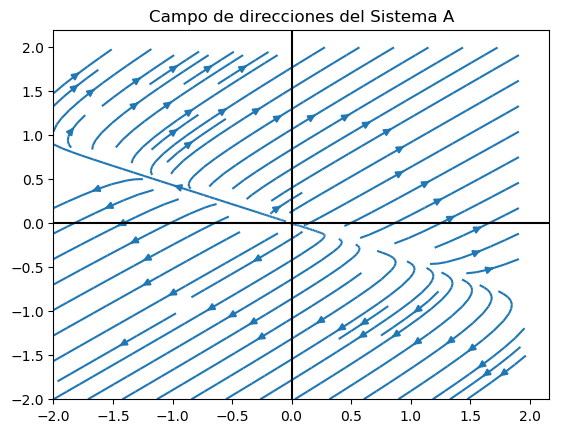

PyObject <matplotlib.lines.Line2D object at 0xd0fc840c>

In [4]:
#Definimos primero los puntos en donde estarían situadas los inicios de los vectores    
xs = collect(-2:0.2:2)
ys = collect(-2:0.2:2)
#Creamos un mallado con base en los arreglos anteriores
X,Y = np.meshgrid(xs,ys)
#Generamos las funciones que constituyen el espacio fase del sistema A
U = 3*X+6*Y
V = 2*X+5*Y

plt.streamplot(xs,ys,U,V)
plt.title("Campo de direcciones del Sistema A")
plt.axhline(0, color= "black")
plt.axvline(0, color= "black")

Como podemos ver, el campo de direcciones diverge a infinito, pues se trata de una fuente para el sistema $A$. Veamos ahora como es el campo de vectorial del sistema $B$

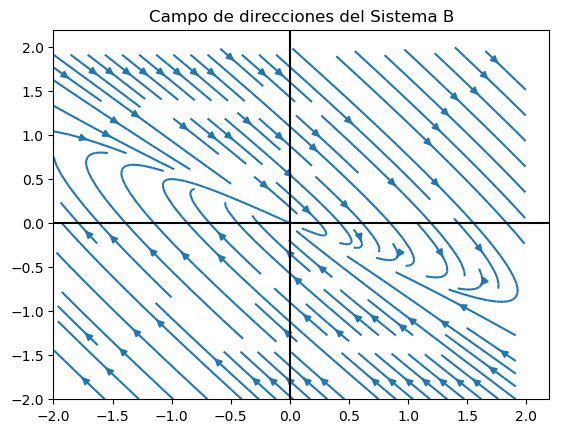

PyObject <matplotlib.lines.Line2D object at 0xd10bf26c>

In [5]:
#Definimos primero los puntos en donde estarían situadas los inicios de los vectores    
xs = collect(-2:0.2:2)
ys = collect(-2:0.2:2)
#Creamos un mallado con base en los arreglos anteriores
X,Y = np.meshgrid(xs,ys)
#Generamos las funciones que constituyen el espacio fase del sistema A
U = 2X+5Y
V = -3X-6Y
plt.streamplot(xs,ys,U,V)
plt.title("Campo de direcciones del Sistema B")
plt.axhline(0,color = "black")
plt.axvline(0,color = "black")

Para este caso podemos apreciar el caso contrario, tenemos un sumidero. En ambos casos, nuestros puntos de equilibrio están situados en el $\vec{0}$ pues es ahí de donde parten la fuente y el sumidero.

Ahora resolvamos los sistemas de EDO numéricamente con el integrador de Euler. Veamos que pasa para la matriz $A$

In [11]:
#Definimos una función que nos resuelva nuestro sistema asociado a la matriz A
function solSistEDO(α,β,γ,δ,x0,t0,tf,dt)
    #x0 en este caso es un vector dos dimensional que contiene nuestras condiciones iniciales
    #definimos el sistema de ecuaciones
    function sistEDO(X)
        #X es un vector 2-dimensional con entrada (x_1,x_2)
        #pedimos que nos regrese cada una de las ecuaciones del sistema
        return [α*X[1]+β*X[2], γ*X[1]+δ*X[2]]
    end
    #Hacemos que eulerND nos resuelva el sistema de ecuaciones...
    return eulerND(sistEDO,x0,t0,tf,dt)
end

solSistEDO (generic function with 1 method)

Recordemos que el sistema de la matriz $A$ es

$$
\begin{cases}
\dot{x}_1&= 3x_1+6x_2\\
\dot{x}_2&= 2x_1+5x_2
\end{cases}
$$

In [12]:
#asignamos los parámetros
α = 3
β = 6
γ = 2
δ = 5
#escogemos condiciones iniciales 
x0 = [-1,1]
x1 = [-6,12]
x2 = rand(Float16,2)
x3 = [6,π]
t0 = 0
tf = 10
dt = 0.01
#Recuperamos nuestros datos
tiempos, as0 = solSistEDO(α,β,γ,δ,x0,t0,tf,dt)
tiempos, as1 = solSistEDO(α,β,γ,δ,x1,t0,tf,dt)
tiempos, as2 = solSistEDO(α,β,γ,δ,x2,t0,tf,dt)
tiempos, as3 = solSistEDO(α,β,γ,δ,x3,t0,tf,dt)

(0.0:0.01:10.0, [6.0 3.14159; 6.3685 3.41867; … ; 3.03699e32 2.33117e32; 3.26797e32 2.50847e32])

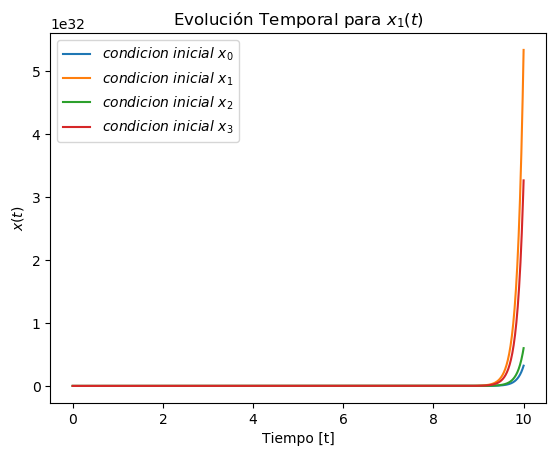

PyObject Text(26.000000000000007, 0.5, '$x(t)$')

In [13]:
# para la solución x_1 tenemos las siguientes gráficas con 4 condiciones iniciales y la solución general
plt.plot(tiempos,as0[:,1],label = L"condicion\ inicial\ x_0")
plt.plot(tiempos,as1[:,1],label = L"condicion\ inicial\ x_1")
plt.plot(tiempos,as2[:,1],label = L"condicion\ inicial\ x_2")
plt.plot(tiempos,as3[:,1],label = L"condicion\ inicial\ x_3")
plt.legend()
plt.title(L"Evolución Temporal para $x_1(t)$")
plt.xlabel("Tiempo [t]")
plt.ylabel(L"x(t)")



Para la evolución temporal de $x_2(t)$ las gráficas son muy similares. Ahora veamos los espacios fase para las 4 condiciones iniciales escogidas

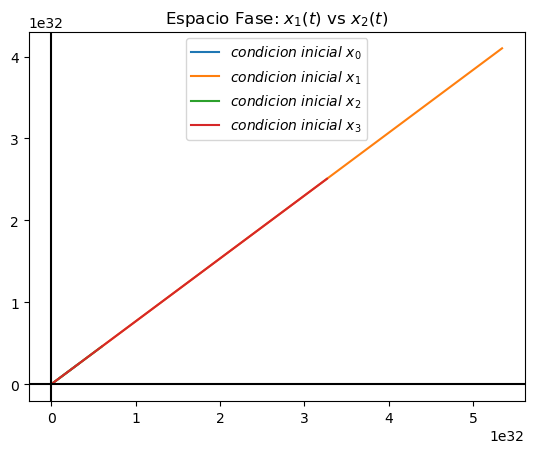

PyObject <matplotlib.lines.Line2D object at 0xd0cf9bac>

In [14]:
plt.plot(as0[:,1],as0[:,2],label = L"condicion\ inicial\ x_0")
plt.plot(as1[:,1],as1[:,2],label = L"condicion\ inicial\ x_1")
plt.plot(as2[:,1],as2[:,2],label = L"condicion\ inicial\ x_2")
plt.plot(as3[:,1],as3[:,2],label = L"condicion\ inicial\ x_3")
plt.title(L"Espacio Fase: $x_1(t)$ vs $x_2(t)$")
plt.legend()
plt.axhline(0,color="black")
plt.axvline(0,color="black")

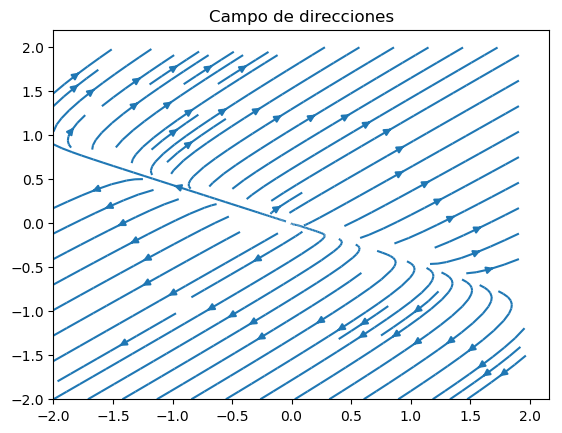

PyObject Text(0.5, 1.0, 'Campo de direcciones')

In [15]:
#El cual se parece al campo vectorial de soluciones
xs = collect(-2:0.2:2)
ys = collect(-2:0.2:2)

X,Y = np.meshgrid(xs,ys)

U = 3X+6Y
V = 2X+5Y
plt.streamplot(xs,ys,U,V)
plt.title("Campo de direcciones")

Podemos ver como en ambas representaciones gráficas del espacio fase, las soluciones divergen, ya que se trata de una fuente, además de que se ajustan ambas gráfias del espacio fase. Ahora veamos que sucede para la matriz $B$

$$
\begin{cases}
\dot{x}_1&= 2x_1+5x_2\\
\dot{x}_2&= -3x_1-6x_2
\end{cases}
$$


In [16]:
α = 2
β = 5
γ = -3
δ = -6
#escogemos las mismas condiciones iniciales que las anteriores
x0 = [-1,1]
x1 = [-6,12]
x2 = rand(Float16,2)
x3 = [6,π]
t0 = 0
tf = 10
dt = 0.01

tiempos, bs0 = solSistEDO(α,β,γ,δ,x0,t0,tf,dt)
tiempos, bs1 = solSistEDO(α,β,γ,δ,x1,t0,tf,dt)
tiempos, bs2 = solSistEDO(α,β,γ,δ,x2,t0,tf,dt)
tiempos, bs3 = solSistEDO(α,β,γ,δ,x3,t0,tf,dt)

(0.0:0.01:10.0, [6.0 3.14159; 6.27708 2.7731; … ; 0.000996601 -0.000597961; 0.000986635 -0.000591981])

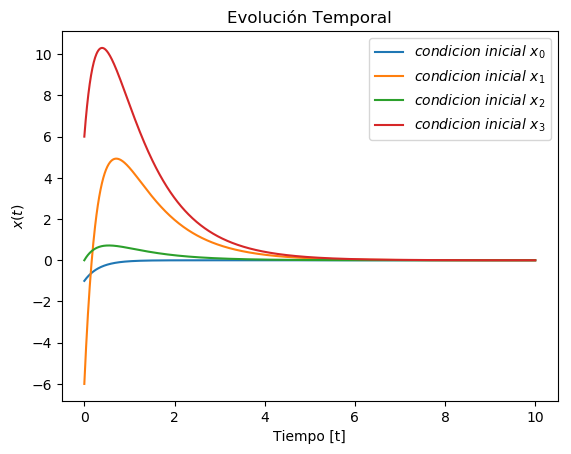

PyObject Text(26.000000000000007, 0.5, '$x(t)$')

In [17]:
# para la solución x_2 tenemos las siguientes gráficas con 4 condiciones iniciales y la solución general
plt.plot(tiempos,bs0[:,1],label = L"condicion\ inicial\ x_0")
plt.plot(tiempos,bs1[:,1],label = L"condicion\ inicial\ x_1")
plt.plot(tiempos,bs2[:,1],label = L"condicion\ inicial\ x_2")
plt.plot(tiempos,bs3[:,1],label = L"condicion\ inicial\ x_3")
plt.legend()
plt.title("Evolución Temporal")
plt.xlabel("Tiempo [t]")
plt.ylabel(L"x(t)")

Aquí podemos ver gráficamente y de manera rápida o cualitativa como es que tenemos un punto de equilibrio alrededor del cero, veamos si nuestro espacio fase dice lo mismo.

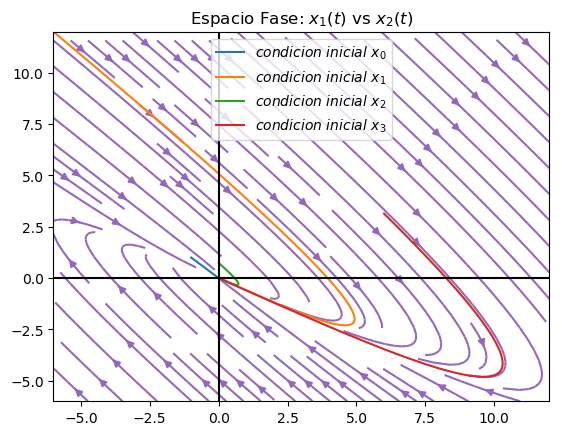

PyObject <matplotlib.streamplot.StreamplotSet object at 0xcefcce6c>

In [18]:
plt.plot(bs0[:,1],bs0[:,2],label = L"condicion\ inicial\ x_0")
plt.plot(bs1[:,1],bs1[:,2],label = L"condicion\ inicial\ x_1")
plt.plot(bs2[:,1],bs2[:,2],label = L"condicion\ inicial\ x_2")
plt.plot(bs3[:,1],bs3[:,2],label = L"condicion\ inicial\ x_3")
plt.title(L"Espacio Fase: $x_1(t)$ vs $x_2(t)$")
plt.legend()
plt.axhline(0,color="black")
plt.axvline(0,color="black")


xs = collect(-6:0.2:12)
ys = collect(-6:0.2:12)

X,Y = np.meshgrid(xs,ys)

U = 2X + 5Y
V = -3X - 6Y
plt.streamplot(xs,ys,U,V)

En esta gráfica podemos apreciar que las soluciones para las 4 condiciones iniciales propuestas se ajustan al campo de vectorial del sistema dinámico.

Pondré un sistema más de pilón, pero para el caso en donde tenemos espirales, es decir, eigenvalores imaginarios. El sistema que elegí y que genera una fuente espiral es el siguiente

$$
\begin{cases}
\dot{x}_1&=2x_1-5x_2\\
\dot{x}_2&=2x_1+3x_2\\
\end{cases}
$$


In [19]:
α = 2
β = -5
γ = 2
δ = 3
x0 = [-1,1]
x1 = rand(Float64,2)
x2 = rand(Float16,2)
x3 = [-2,5]
t0 = 0
tf = 10
dt = 0.01

tiempos, cs0 = solSistEDO(α,β,γ,δ,x0,t0,tf,dt)
tiempos, cs1 = solSistEDO(α,β,γ,δ,x1,t0,tf,dt)
tiempos, cs2 = solSistEDO(α,β,γ,δ,x2,t0,tf,dt)
tiempos, cs3 = solSistEDO(α,β,γ,δ,x3,t0,tf,dt)

(0.0:0.01:10.0, [-2.0 5.0; -2.29 5.11; … ; 4.38642e11 2.57451e11; 4.34542e11 2.73948e11])

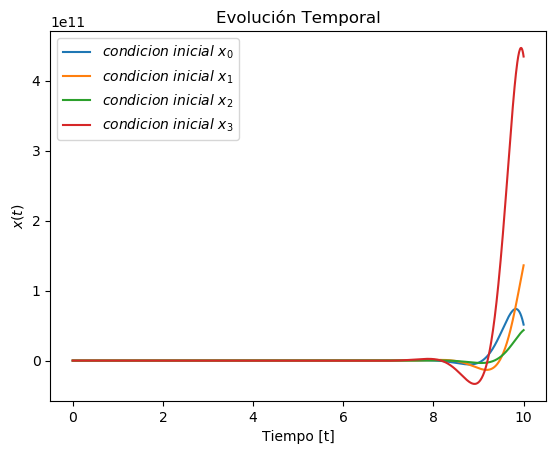

PyObject Text(26.000000000000007, 0.5, '$x(t)$')

In [29]:
#=para el caso imaginario de pilóntenemos las siguientes 
gráficas con 4 condiciones iniciales y la solución general=#
plt.plot(tiempos,cs0[:,1],label = L"condicion\ inicial\ x_0")
plt.plot(tiempos,cs1[:,1],label = L"condicion\ inicial\ x_1")
plt.plot(tiempos,cs2[:,1],label = L"condicion\ inicial\ x_2")
plt.plot(tiempos,cs3[:,1],label = L"condicion\ inicial\ x_3")
plt.legend()
plt.title("Evolución Temporal")
plt.xlabel("Tiempo [t]")
plt.ylabel(L"x(t)")

Ahora veamos sus espacios fases. Para el campo vectorial, determinaré en las celdas siguientes los valores propios para obtener rápidamente las soluciones.

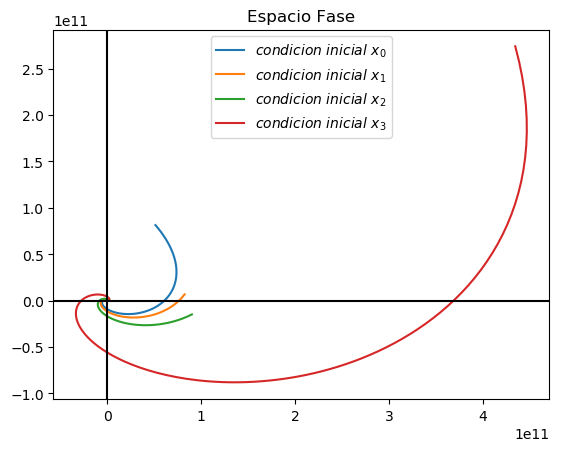

PyObject <matplotlib.lines.Line2D object at 0xcee1488c>

In [20]:
plt.plot(cs0[:,1],cs0[:,2],label = L"condicion\ inicial\ x_0")
plt.plot(cs1[:,1],cs1[:,2],label = L"condicion\ inicial\ x_1")
plt.plot(cs2[:,1],cs2[:,2],label = L"condicion\ inicial\ x_2")
plt.plot(cs3[:,1],cs3[:,2],label = L"condicion\ inicial\ x_3")
plt.title("Espacio Fase")
plt.legend()
plt.axhline(0,color="black")
plt.axvline(0,color="black")

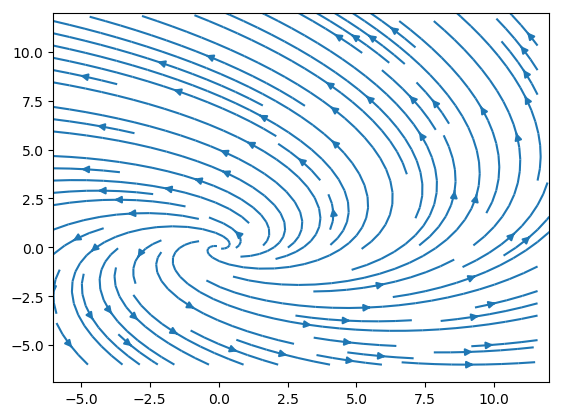

PyObject <matplotlib.streamplot.StreamplotSet object at 0xced75d2c>

In [21]:
#su campo de direcciones
xs = collect(-6:0.2:12)
ys = collect(-6:0.2:12)

X,Y = np.meshgrid(xs,ys)

U = 2X - 5Y
V = 2X + 3Y
plt.streamplot(xs,ys,U,V)

### 3. Calcule los puntos de equilibrio y muestre computacionalmente el plano fase (con su respectivo campo de pendientes) y las curvas solución de los siguientes sistemas:


<li>Oscilador Armonico Simple:<br> 
                $\dot{x}= y $ <br> $\dot{y}= - k x$; $\;\;$  para diferentes valores de $k$
            </li><li>

Igual que en el ejercicio, tomaré una condición inicial y cuatro valores de $k$ para contrastar. A continuación implemento las funciones necesarias para resolver el sistema. Los puntos de equilibrio de este sistema son $y=0$ y $x=0$. 

In [22]:
#Definimos una función que nos resuelva nuestro sistema del oscilador armónico simple
#Reciclaré el código que ya tenía anteriormente
function solSistEDO(k,x0,t0,tf,dt)
    #x0 en este caso es un vector dos dimensional que contiene nuestras condiciones iniciales
    #definimos el sistema de ecuaciones
    function osciladorSimple(X)
        #X es un vector 2-dimensional con entrada (x,y)
        #pedimos que nos regrese cada una de las ecuaciones del sistema
        return [X[2], -k*X[1]]
    end
    #Hacemos que eulerND nos resuelva el sistema de ecuaciones...
    return eulerND(osciladorSimple,x0,t0,tf,dt)
end

solSistEDO (generic function with 2 methods)

In [23]:
k1 = 1/sqrt(2)
k2 = -1
k3 = 1/2
k4 = 7/4
#condición inicial
x0 = [π,-π]
t0 = 0
tf = 10
dt = 0.001

tiempos, OS1 = solSistEDO(k1,x0,t0,tf,dt)
tiempos, OS2 = solSistEDO(k2,x0,t0,tf,dt)
tiempos, OS3 = solSistEDO(k3,x0,t0,tf,dt)
tiempos, OS4 = solSistEDO(k4,x0,t0,tf,dt)

(0.0:0.001:10.0, [3.14159 -3.14159; 3.13845 -3.14709; … ; 1.03076 -5.07555; 1.02568 -5.07735])

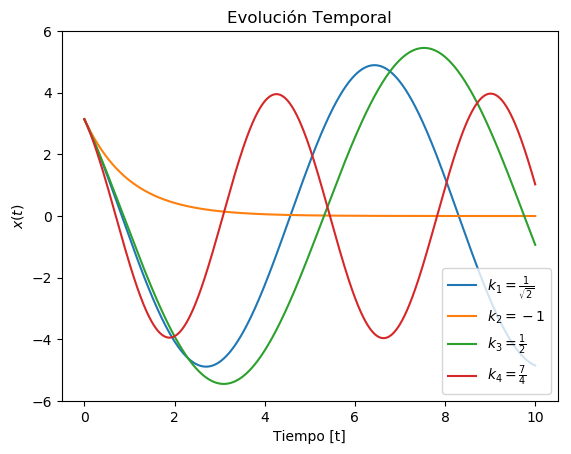

PyObject Text(26.000000000000007, 0.5, '$x(t)$')

In [24]:
#Reciclamos código de aquí en adelante
plt.plot(tiempos,OS1[:,1],label = L"k_1=\frac{1}{\sqrt{2}}")
plt.plot(tiempos,OS2[:,1],label = L"k_2=-1")
plt.plot(tiempos,OS3[:,1],label = L"k_3=\frac{1}{2}")
plt.plot(tiempos,OS4[:,1],label = L"k_4=\frac{7}{4}")
plt.legend()
plt.title("Evolución Temporal")
plt.xlabel("Tiempo [t]")
plt.ylabel(L"x(t)")

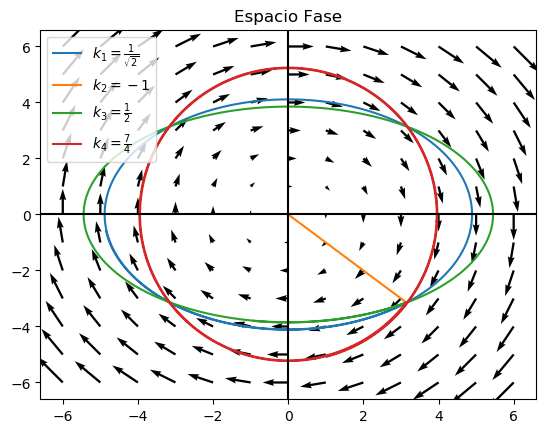

PyObject <matplotlib.quiver.Quiver object at 0xced43d4c>

In [25]:
plt.plot(OS1[:,1],OS1[:,2],label = L"k_1=\frac{1}{\sqrt{2}}")
plt.plot(OS2[:,1],OS2[:,2],label = L"k_2=-1")
plt.plot(OS3[:,1],OS3[:,2],label = L"k_3=\frac{1}{2}")
plt.plot(OS4[:,1],OS4[:,2],label = L"k_4=\frac{7}{4}")
plt.title("Espacio Fase")
plt.legend()
plt.axhline(0,color="black")
plt.axvline(0,color="black")

xs = collect(-6:1:6)
ys = collect(-6:1:6)

X,Y = np.meshgrid(xs,ys)

U = Y
V = -X
plt.quiver(xs,ys,U,V)

<li>Oscilador Armonico Amortiguado:<br> 
                $\dot{x}= y $ <br> $\dot{y}= - k x - \beta y$; $\;\;$  para diferentes valores de $k$ y $\beta$ 
            </li><li>

In [26]:
#reciclado
function solSistEDO(k,β,x0,t0,tf,dt)
    #x0 en este caso es un vector dos dimensional que contiene nuestras condiciones iniciales
    #definimos el sistema de ecuaciones
    function osciladorAmortiguado(X)
        #X es un vector 2-dimensional con entrada (x,y)
        #pedimos que nos regrese cada una de las ecuaciones del sistema
        return [X[2], -k*X[1]-β*X[2]]
    end
    #Hacemos que eulerND nos resuelva el sistema de ecuaciones...
    return eulerND(osciladorAmortiguado,x0,t0,tf,dt)
end

solSistEDO (generic function with 3 methods)

In [27]:
k1 = 7/4
β1 = 1
β2 = 0.1
β3 = -0.1
#condición inicial
x0 = [π,-π]
t0 = 0
tf = 10
dt = 0.001

tiempos, OA1 = solSistEDO(k1,β1,x0,t0,tf,dt)
tiempos, OA2 = solSistEDO(k1,β2,x0,t0,tf,dt)
tiempos, OA3 = solSistEDO(k1,β3,x0,t0,tf,dt)

(0.0:0.001:10.0, [3.14159 -3.14159; 3.13845 -3.1474; … ; 1.64172 -8.46711; 1.63326 -8.47083])

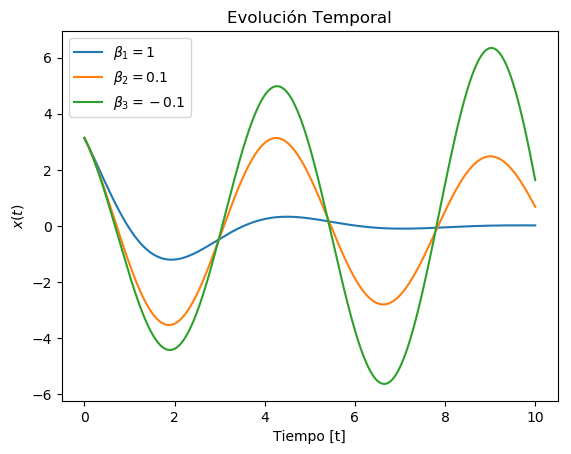

PyObject Text(26.000000000000007, 0.5, '$x(t)$')

In [28]:
plt.plot(tiempos,OA1[:,1],label = L"\beta_1=1")
plt.plot(tiempos,OA2[:,1],label = L"\beta_2=0.1")
plt.plot(tiempos,OA3[:,1],label = L"\beta_3=-0.1")
plt.legend()
plt.title("Evolución Temporal")
plt.xlabel("Tiempo [t]")
plt.ylabel(L"x(t)")

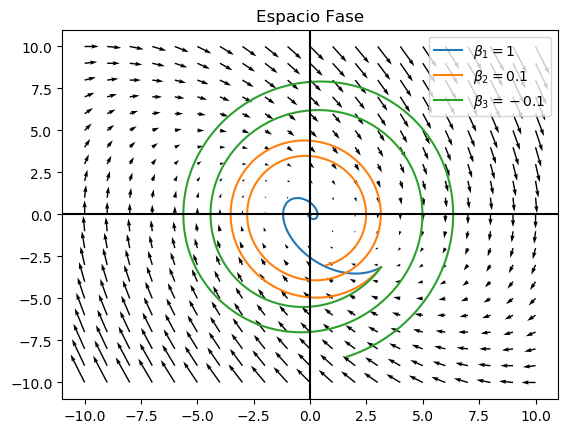

PyObject <matplotlib.quiver.Quiver object at 0xcdf06fec>

In [29]:
plt.plot(OA1[:,1],OA1[:,2],label = L"\beta_1=1")
plt.plot(OA2[:,1],OA2[:,2],label = L"\beta_2=0.1")
plt.plot(OA3[:,1],OA3[:,2],label = L"\beta_3=-0.1")
plt.title("Espacio Fase")
plt.legend()
plt.axhline(0,color="black")
plt.axvline(0,color="black")

xs = collect(-10:1:10)
ys = collect(-10:1:10)

X,Y = np.meshgrid(xs,ys)

U = Y
V = -X - Y
plt.quiver(xs,ys,U,V)

Nota: Esos dos últimos espacios fase los he hecho con quiver porque con streamplot se veía muy amontonado de colores.

<li>
                $\dot{x}=3x+y$ <br>  $\dot{y}=x-y$
            </li>

In [30]:
function solSistEDO(x0,t0,tf,dt)
    #x0 en este caso es un vector dos dimensional que contiene nuestras condiciones iniciales
    #definimos el sistema de ecuaciones
    function sist(X)
        #X es un vector 2-dimensional con entrada (x,y)
        #pedimos que nos regrese cada una de las ecuaciones del sistema
        return [3*X[1]+X[2], X[1]-X[2]]
    end
    #Hacemos que eulerND nos resuelva el sistema de ecuaciones...
    return eulerND(sist,x0,t0,tf,dt)
end

solSistEDO (generic function with 4 methods)

In [31]:
x0 = [π,-π]
t0 = 0
tf = 10
dt = 0.001

tiempos, S1 = solSistEDO(x0,t0,tf,dt)

(0.0:0.001:10.0, [3.14159 -3.14159; 3.14788 -3.13531; … ; 2.4357e14 5.7499e13; 2.44358e14 5.7685e13])

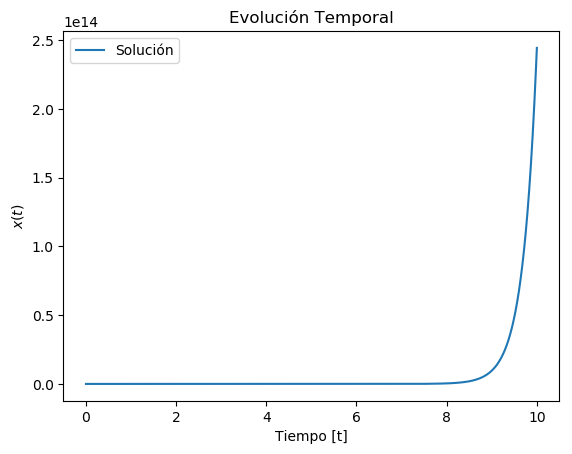

PyObject Text(26.000000000000007, 0.5, '$x(t)$')

In [32]:
plt.plot(tiempos,S1[:,1],label = "Solución")
plt.legend()
plt.title("Evolución Temporal")
plt.xlabel("Tiempo [t]")
plt.ylabel(L"x(t)")

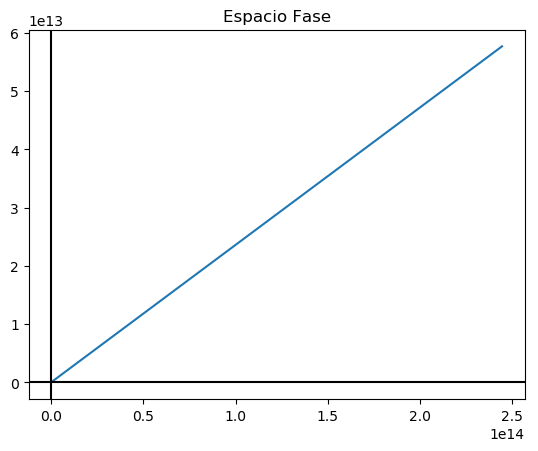

PyObject <matplotlib.lines.Line2D object at 0xcddd97ac>

In [33]:
plt.plot(S1[:,1],S1[:,2])
plt.title("Espacio Fase")
plt.axhline(0,color="black")
plt.axvline(0,color="black")

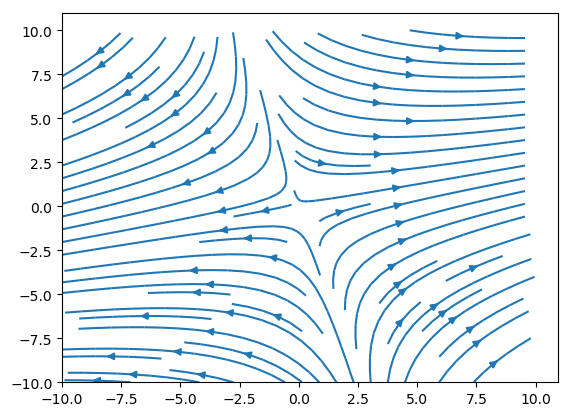

PyObject <matplotlib.streamplot.StreamplotSet object at 0xcdcb0fcc>

In [34]:
xs = collect(-10:1:10)
ys = collect(-10:1:10)

X,Y = np.meshgrid(xs,ys)

U = 3X + Y
V = X - Y
plt.streamplot(xs,ys,U,V)

 $\dot{\vec{x}}(t) = \mathbb{A} \vec{x}(t) $  ; $\;\;$ donde $\mathbb{A} $    
             

$\mathbb{A}
=
\begin{pmatrix} 
1 & 1 \\
4  & -2
\end{pmatrix}
$ 
            
              
           
$\mathbb{A}
=
\begin{pmatrix} 
a & 0 \\
0  & -1
\end{pmatrix}
$ ; $\;\;$  para diferentes valores de $a$
              

In [35]:
function solSistEDO(x0,t0,tf,dt)
    #x0 en este caso es un vector dos dimensional que contiene nuestras condiciones iniciales
    #definimos el sistema de ecuaciones
    function A1(X)
        #X es un vector 2-dimensional con entrada (x,y)
        #pedimos que nos regrese cada una de las ecuaciones del sistema
        return [X[1]+X[2], 4*X[1]-2*X[2]]
    end
    #Hacemos que eulerND nos resuelva el sistema de ecuaciones...
    return eulerND(A1,x0,t0,tf,dt)
end

solSistEDO (generic function with 4 methods)

In [36]:
x0 = [π,-π]
t0 = 0
tf = 10
dt = 0.001

tiempos, A1 = solSistEDO(x0,t0,tf,dt)

(0.0:0.001:10.0, [3.14159 -3.14159; 3.14159 -3.12274; … ; 8.94641e8 8.94641e8; 8.9643e8 8.9643e8])

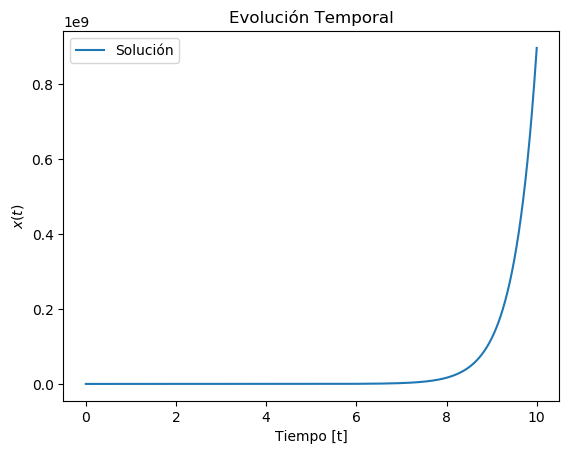

PyObject Text(26.000000000000007, 0.5, '$x(t)$')

In [37]:
plt.plot(tiempos,A1[:,1],label = "Solución")
plt.legend()
plt.title("Evolución Temporal")
plt.xlabel("Tiempo [t]")
plt.ylabel(L"x(t)")

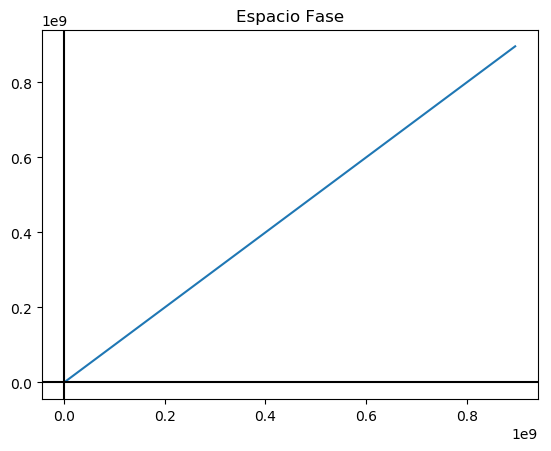

PyObject <matplotlib.lines.Line2D object at 0xce92e88c>

In [38]:
plt.plot(A1[:,1],A1[:,2])
plt.title("Espacio Fase")
plt.axhline(0,color="black")
plt.axvline(0,color="black")

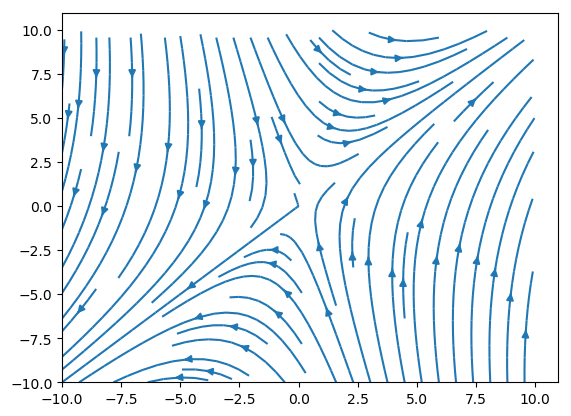

PyObject <matplotlib.streamplot.StreamplotSet object at 0xcdc265cc>

In [39]:
xs = collect(-10:1:10)
ys = collect(-10:1:10)

X,Y = np.meshgrid(xs,ys)

U = X + Y
V = 4X - 2Y
plt.streamplot(xs,ys,U,V)

In [40]:
function solSistEDO(a,x0,t0,tf,dt)
    #x0 en este caso es un vector dos dimensional que contiene nuestras condiciones iniciales
    #definimos el sistema de ecuaciones
    function A2(X)
        #X es un vector 2-dimensional con entrada (x,y)
        #pedimos que nos regrese cada una de las ecuaciones del sistema
        return [a*X[1], -X[2]]
    end
    #Hacemos que eulerND nos resuelva el sistema de ecuaciones...
    return eulerND(A2,x0,t0,tf,dt)
end

solSistEDO (generic function with 4 methods)

In [41]:
a1 = -1
a2 = 2
a3 = 10
x0 = [π,-π]
t0 = 0
tf = 10
dt = 0.001

tiempos, A2 = solSistEDO(a1,x0,t0,tf,dt)
tiempos, A21 = solSistEDO(a2,x0,t0,tf,dt)
tiempos, A22 = solSistEDO(a3,x0,t0,tf,dt)

(0.0:0.001:10.0, [3.14159 -3.14159; 3.17301 -3.13845; … ; 5.08823e43 -0.000142058; 5.13911e43 -0.000141916])

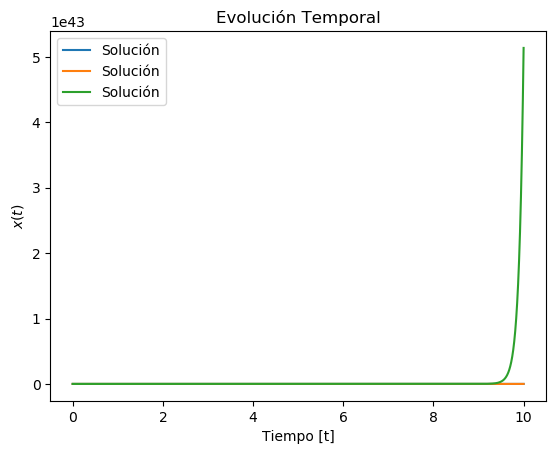

PyObject Text(26.000000000000007, 0.5, '$x(t)$')

In [42]:
plt.plot(tiempos,A2[:,1],label = "Solución")
plt.plot(tiempos,A21[:,1],label = "Solución")
plt.plot(tiempos,A22[:,1],label = "Solución")
plt.legend()
plt.title("Evolución Temporal")
plt.xlabel("Tiempo [t]")
plt.ylabel(L"x(t)")

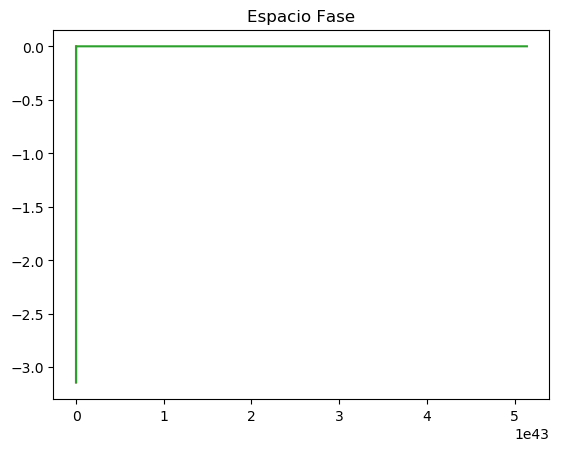

PyObject Text(0.5, 1.0, 'Espacio Fase')

In [43]:
plt.plot(A2[:,1],A2[:,2])
plt.plot(A21[:,1],A21[:,2])
plt.plot(A22[:,1],A22[:,2])

plt.title("Espacio Fase")


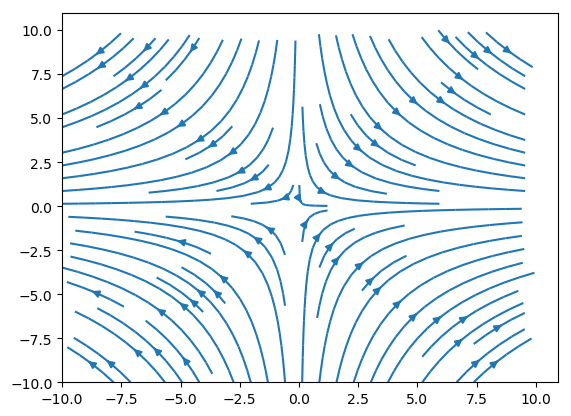

PyObject <matplotlib.streamplot.StreamplotSet object at 0xcd0648ec>

In [49]:
xs = collect(-10:1:10)
ys = collect(-10:1:10)

X,Y = np.meshgrid(xs,ys)

U = X 
V = -Y
U1 = -X
V2 = -Y
plt.streamplot(xs,ys,U,V)    #Este representa una fuente xq TrA>=0
#plt.streamplot(xs,ys,U1,V2) #Este representa un sumidero xq TrA<0

Este sistema se me ha hecho raro, si a $a$ le asignamos valores negativos entonces el sistema se comporta como un sumidero, pero si le damos valores positivos entonces se comporta como una fuente. Tenemos un caso en donde $TrA=\det A$, en este caso podemos apreciar un punto silla que es un sumidero si $TrA<0$ o es una fuente si $TrA\geq0$

**Problema Opcional (puntos extra):**

Implemente el método de Runge-Kutta de orden 4 de manera general

Un método ampliamente usado en el cómputo científico (podría decirse que es el método estándar) es el método de [Runge-Kutta de cuatro pasos](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (denotado comúnmente como  **RK4**) obedece la siguiente regla:

$$
\begin{align}
\mathbf{k}_1 &= \mathbf{f}(\mathbf{x}_{i-1},t_{i-1})\\
\mathbf{k}_2 &= \mathbf{f}(\mathbf{x}_{i-1} + (h/2)\mathbf{k}_1,t_{i-1}+h/2)\\
\mathbf{k}_3 &= \mathbf{f}(\mathbf{x}_{i-1} + (h/2)\mathbf{k}_2,t_{i-1}+h/2)\\
\mathbf{k}_4 &= \mathbf{f}(\mathbf{x}_{i-1} + h\mathbf{k}_3,t_{i-1}+h)\\
 & \\
\mathbf{x}_{i} &= \mathbf{x}_{i-1} + \frac{h}{6}\left( \mathbf{k}_1 + 2 \mathbf{k}_2 + 2 \mathbf{k}_3 + \mathbf{k}_4 \right)
\end{align}
$$

La implementación computacional la presento a continuación

In [88]:
"""La función recibe como parámetros una función f(x), una condición inicial, un tiempo inicial
un tiempo final y un paso de integración, igual que el integrador de Euler"""

function RK4(f,x0,t0,tf,h)
    #=al igual que en la función de eulerND, definimos una matriz de dimensión 
    (número de iteraciones × dimensión del sistema dinámico) como conjunto solución=#
    t = range(t0, stop = tf, step = h)
    n = length(t)
    dim = length(x0)
    #lo hacemos en un arreglo de ceros
    xs = zeros(n,dim)
    #imponemos la condición inicial en el primer renglón
    xs[1,:] = x0
    #generamos un ciclo for con las iteraciones de runge-kutta de cuarto orden
    for i in  2:n
        k1 = f(xs[i-1,:])
        k2 = f(xs[i-1,:]+(h/2)*k1)
        k3 = f(xs[i-1,:]+(h/2)*k2)
        k4 = f(xs[i-1,:]+h*k3)
        
        xs[i,:] = xs[i-1,:] + (h/6)*(k1+2*k2+2*k3+k4)
    end
    #=regresamos el resultado en una tupla, con los tiempos en la primera entrada y 
    el conjunto solución en la segunda entrada=#
    return (t , xs)
end

RK4 (generic function with 1 method)